<a href="https://colab.research.google.com/github/FernandoGuillen-lab/DataScience/blob/main/copia_mapeo_de_coordenadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point, LineString, Polygon

In [ ]:
#costco=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/0.9ydhicb20ri0.hyen61dzemjtiendasCostco_.csv")
costco=pd.read_csv("/content/drive/MyDrive/tiendasCostco_ (1).csv")
suc=geopandas.GeoDataFrame(costco,geometry=geopandas.points_from_xy(costco.longitud,costco.latitud))
"""[" longitud"]   [" latitud"]"""
suc.columns

Index(['id', ' nombre', ' direccion', ' ubicacion', 'latitud', 'longitud',
       ' tel centro llantero', 'geometry'],
      dtype='object')

In [ ]:
estados=geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/mexican-states (1).shp")


estados.columns

Index(['ISO3166-2', 'admin_leve', 'boundary', 'is_in_coun', 'is_in_co_1',
       'name', 'name_en', 'name_es', 'name_pl', 'name_ru', 'name_uk', 'place',
       'ref', 'type', 'wikidata', 'wikipedia', 'geometry'],
      dtype='object')

In [ ]:
estados["region"]=0
estados.loc[estados["name"].isin(["Tlaxcala", "Puebla", "Ciudad de México","México", "Morelos", "Estado de México", "Hidalgo"]),"region"]="Centro"
estados.loc[estados["name"].isin(["Jalisco", "Michoacán de Ocampo", "Colima", "Aguascalientes", "Nayarit", "Zacatecas", "San Luis Potosí", "Guanajuato","Querétaro"]),"region"]="Centro Oeste"
estados.loc[estados["name"].isin(["Chihuahua", "Coahuila de Zaragoza", "Nuevo León", "Tamaulipas", "Durango"]),"region"]="Noreste"
estados.loc[estados["name"].isin(["Baja California", "Baja California Sur", "Sonora", "Sinaloa"]),"region"]="Noroeste"
estados.loc[estados["name"].isin(["Guerrero", "Veracruz de Ignacio de la Llave", "Oaxaca", "Tabasco", "Chiapas", "Campeche", "Yucatán", "Quintana Roo"]),"region"]="Sureste"

estados.columns

Index(['ISO3166-2', 'admin_leve', 'boundary', 'is_in_coun', 'is_in_co_1',
       'name', 'name_en', 'name_es', 'name_pl', 'name_ru', 'name_uk', 'place',
       'ref', 'type', 'wikidata', 'wikipedia', 'geometry', 'region'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


<Axes: >

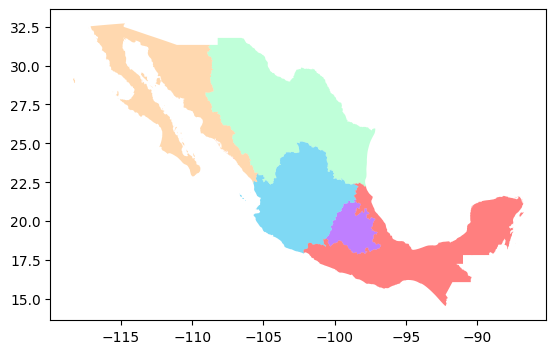

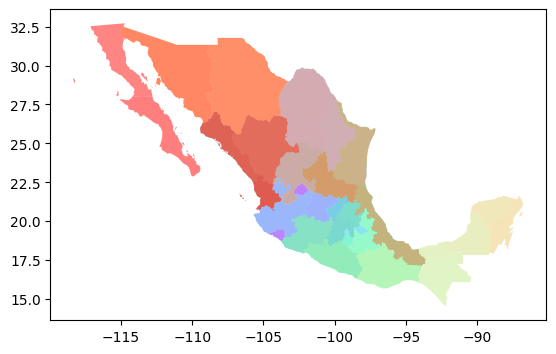

In [ ]:
regiones=estados.dissolve(by="region")
regiones=regiones.loc[:,"geometry"]
reg=geopandas.GeoDataFrame(geopandas.GeoSeries(regiones))
reg.plot(alpha=0.5, cmap="rainbow")
estreg=geopandas.sjoin(estados, reg, how="inner", op= "intersects")
estreg
estreg.plot(alpha=.5, cmap="rainbow")

In [ ]:
regiones=estados.dissolve(by="region")
regiones=regiones.loc[:,"geometry"]
reg=geopandas.GeoDataFrame(geopandas.GeoSeries(regiones))
reg

,geometry
region,
Centro,"POLYGON ((-99.06596 18.33265, -99.06612 18.333..."
Centro Oeste,"MULTIPOLYGON (((-106.24013 21.33311, -106.2398..."
Noreste,"POLYGON ((-104.24942 22.74840, -104.24981 22.7..."
Noroeste,"MULTIPOLYGON (((-114.29280 27.11006, -114.2928..."
Sureste,"MULTIPOLYGON (((-96.05972 15.77985, -96.06001 ..."


In [ ]:
suc=suc.set_crs(estreg.crs)
estreg=estreg.to_crs(epsg=3395)
suc=suc.to_crs(epsg=3395)
suc.crs

<Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 80°S and 84°N.
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
estreg=estreg.to_crs(epsg=3395)
suc=suc.to_crs(epsg=3395)

In [ ]:
suc["geometry"]=suc.buffer(120000)
suc.columns

Index(['id', ' nombre', ' direccion', ' ubicacion', 'latitud', 'longitud',
       ' tel centro llantero', 'geometry'],
      dtype='object')

<Axes: >

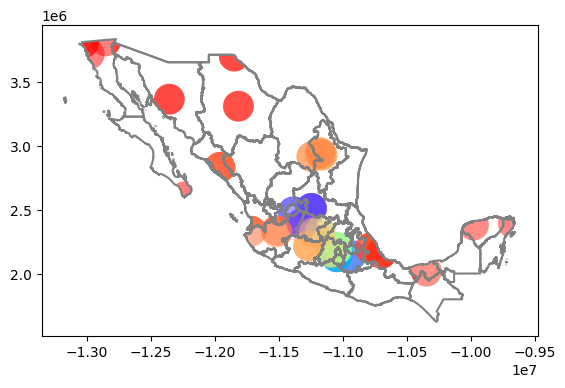

In [ ]:
inter=geopandas.overlay(estreg,suc,how="intersection")
ax=estreg.boundary.plot(color="gray")
inter.plot(ax=ax,alpha=0.5,cmap="rainbow")